Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `LAB_SECTION` below:

In [ ]:
NAME = "TASNIM RAHMAN MOUMITA"
ID = "22301689"
SECTION = "08"

# Part 1: Solving a linear system using inverse matrix - 1 Marks

We have a linear system

\begin{align}
&a_{11} x_1 + a_{12} x_2 +  \cdots  + a_{1n} x_n = b_1\\
&a_{21} x_1 + a_{22} x_2 +  \cdots + a_{2n} x_n = b_2\\
&\cdots\\
&a_{n1} x_1 + a_{n2} x_2 +  \cdots + a_{nn} x_n = b_n\\
\end{align}

It is convenient to express this system in the
matrix form

\begin{align}
Ax = b
\end{align}

where $A$ is an $n \times n$ square matrix with elements $a_{ij}$, and $x$, $b$ are $n \times 1$ vectors.

We have to keep in mind that this system will have a unique solution iff $A$ is non-singular, given by $x = A^{-1}b.$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
def get_result_by_inverse_matrix(A, b):
  # A and b are numpy arrays

  # first check if the A is non-singular matrix. We know that the determinant of
  # a non-singular matrix will be non-zero


  # YOUR CODE HERE
  #raise NotImplementedError()
  dt_A = np.linalg.det(A)
  if dt_A == 0:
    sys.exit("")
  else:
    inv_A = np.linalg.inv(A)
    x = np.dot(inv_A,b)


  # # HINT:
  # You may find functions such as linalg.det(), linalg.inv, etc. of the numpy package useful

    return x

In [3]:
# Test case for the get_result_by_inverse_matrix(A, b) function.

data_A = np.array([[1, 2, 1], [1, -2, 2], [2, 12, -2]])
data_b = np.array([0,4,4])

test = get_result_by_inverse_matrix(data_A, data_b)
results = [11, -2.5, -6]

np.testing.assert_array_equal(test, results)

# Part 2: Gaussian elimination - 1.5 Marks

Gaussian elimination uses elementary row operations to transform the system to upper triangular form $Ux = y$.

Elementary row operations include swapping rows and adding multiples of one rowto another.
They won’t change the solution $x$, but will change the matrix $A$ and the right-hand side $b$.

The upper triangular matrix, $𝑈$, is defined as

\begin{bmatrix}
u_{11} & u_{12} & \cdots & u_{1n}\\
0 & u_{22} & \cdots & u_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
0 & \cdots & 0 & u_{nn}\\
\end{bmatrix}


**Algorithm of Gaussian elimination**

Let $A^{(1)}=A$ and $b^{(1)}=b$. Then for each k from 1 to $n-1$, compute a new matrix $A^{(k+1)}$ and right-hand side $b^{(k+1)}$ by the following procedure:


1.   Define the row multipliers

\begin{align}
m_{ij} = \frac{a_{ik}^{(k)}}{a_{kk}^{(k)}}, i=k+1,\cdot \cdot \cdot,n.
\end{align}
2.   Use these to remove the unknown $x_k$ from equations $k + 1$ to $n$, leaving

\begin{align}
a_{ij}^{(k+1)}=a_{ij}^{(k)}-m_{ik}a_{kj}^{(k)}, b_{i}^{(k+1)}=b_{i}^{(k)}-m_{ik}b_{k}^{(k)}, i,j=k+1,\cdot \cdot \cdot, n.
\end{align}

It is helpful to combine these matrices to form an Augmented matrix (matrix $𝑏$ is the fourth column). We will perform this row operations on the Augmented matrix. It takes care of both $𝐴$ and $𝑏$ matrixes at the same time.

After generating the upper triangular matrix, we have to apply **backward substitution method**.
For any $n \times n$ upper triangular system, $Ux = b$, the solution is:

\begin{align}
x_j = \frac{b_j-\sum_{k=j+1}^{n}u_{jk}x_k}{u_{jj}}, j = n, n-1, \cdot\cdot\cdot, 1.
\end{align}

Here we assumed that $det𝑈≠0$.


In [4]:
def get_result_gaussian_elimination(n, A):
  # n is the number of unknowns
  # A is the Augmented n x n+1 matrix. (numpy array)


  # Making numpy array of n size and initializing
  # to zero for storing solution vector
  x = np.zeros(n)


  # YOUR CODE HERE
  #raise NotImplementedError()

  for col in range(n):
    for row in range(col+1,n):
      multiplier = A[row][col]/A[col][col]
      for i in range(n+1):
        A[row][i] = A[row][i] - multiplier * A[col][i]


  x[n-1] = A[n-1][n]/A[n-1][n-1]
  for i in range(n-2,-1,-1):
    x[i] = A[i][n]
    for j in range(i+1,n):
      x[i] = x[i] - A[i][j]*x[j]
    x[i] = x[i]/A[i][i]


  # HINT:
  # 1. Apply Gauss Elimination
  # 2. Apply Back Substitution

  return x

In [5]:
# Test case for the get_result_gaussian_elimination(n, A) function.

data_n = 3
data_A = np.array([[1, 2, 1, 0], [1, -2, 2, 4], [2, 12, -2, 4]])

test = get_result_gaussian_elimination(data_n, data_A)
results = [11, -2.5, -6]

np.testing.assert_array_equal(test, results)

# Part 3: LU Decomposition - 1.5 Marks

We will transform the $n \times n$ matrix $A$ into a product of two triangular matrix: one lower triangular $(L)$ and the other upper triangular $(U)$.

\begin{align}
A = LU
\end{align}

**Algorithm of LU decomposition:**


1.   Initialize  $L$  to an identity matrix,  $I$  of dimension  $n×n$  and  $U=A$ .
2.   For  $i=1,…,n$  do Step $3$
3.   &nbsp;&nbsp; For  $j=i+1,…,n$  do Steps $4$-$5$
4.  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Set  $l_{ji}=u_{ji}/u_{ii}$
5. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Perform  $U_j=(U_j−l_{ji}U_i)$  (where  $U_i,U_j$  represent the  $i$  and  $j$  rows of the matrix  $U,$  respectively)

*   We know, The linear system in matrix form is $𝐴𝑥=𝑏$.
*   Using the decomposition, we get $𝐿𝑈𝑥=𝑏$.
*    Now, let $𝑈𝑥=𝑦⟹𝐿𝑦=𝑏$.
*   Since $𝐿$ is lower triangular, we solve $𝐿𝑦=𝑏$ to obtain $𝑦$ by forward substitution.
*   Since $𝑈$ and $𝑦$ are known, we solve $𝑈𝑥=𝑦$ to obtain $𝑥$ by backward substitution.

In [7]:
def lu(A):

  #Get the number of rows
  n = A.shape[0]

  U = A.copy()
  L = np.eye(n, dtype=np.double)


   # YOUR CODE HERE
  #raise NotImplementedError()
  for i in range(0,len(A)) :
    if A[i][i] == 0 :
        continue
    for j in range(i+1,len(A)) :
        m = A[j][i]/A[i][i]
        L[j][i] += m
        for k in range(0,len(A)) :
            A[j][k] = A[j][k] - m*A[i][k]
    U = A


  # HINT:
  #Loop over rows
  # for i in range(n):
    #Eliminate entries below i with row operations
    #on U and reverse the row operations to
    #manipulate L

  return L, U



def forward_substitution(L, b):

  #Get number of rows
  n = L.shape[0]

  #Allocating space for the solution vector
  y = np.zeros_like(b, dtype=np.double);


  # YOUR CODE HERE
  #raise NotImplementedError()
  y = np.linalg.inv(L).dot(b)


  # HINT:
  #Perform the forward-substitution.
  #Initialize  with the first row.
  #Loop over rows in reverse (from the bottom  up),
  #Start with the second to last row, because  the
  #last row solve was completed in the last step.

  return y



def back_substitution(U, y):

  #Number of rows
  n = U.shape[0]

  #Allocating space for the solution vector
  x = np.zeros_like(y, dtype=np.double);


  # YOUR CODE HERE
  #raise NotImplementedError()
  x = np.linalg.inv(U).dot(y)

  # HINT:
  #Perform the back-substitution.
  #Initialize with the last row.
  #Loop over rows in reverse (from the bottom up),
  #Start with the second to last row, because the
  #last row solve was completed in the last step.

  return x



def lu_solve(A, b):

  L, U = lu(A)

  y = forward_substitution(L, b)

  return back_substitution(U, y)

In [8]:
# Test case for the lu_solve(A, b) function.

data_A = np.array([[1., 2., 1.], [1., -2., 2.], [2., 12., -2.]])
data_b = np.array([0., 4., 4.])

test = lu_solve(data_A, data_b)
results = [11, -2.5, -6]

np.testing.assert_array_equal(test, results)

# Daily Evaluation - 4 Marks

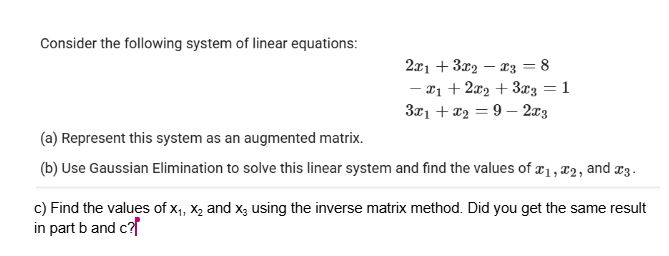

In [11]:
#**# Answer #**#

import numpy as np

A = np.array([
    [2, 3, -1],
    [-1, 2, 3],
    [3, 1, 2]
], dtype=np.double)

b = np.array([8, 1, 9], dtype=np.double)

##Answer-(a)): Augmented Matrix :

aug_matrix = np.column_stack((A, b))
print("Augmented Matrix:")
print(aug_matrix)


##Answer-(b): Gaussian Elimination :


data_num = 3

aug_for_gauss = np.array([
    [2, 3, -1, 8],
    [-1, 2, 3, 1],
    [3, 1, 2, 9]
], dtype=np.double)

gaussian_result = get_result_gaussian_elimination(data_n, aug_for_gauss)
print("Solving using Gaussian Elimination:", gaussian_result)

## Answer-(c): Inverse Matrix Method :


inverse_result = get_result_by_inverse_matrix(A, b)
print("Solving using Inverse Matrix:", inverse_result)

#checking if the same result of part b and c  are equal or not:


#yes, from the above calculation and outputs found below, it can be said that, we got the same result.

Augmented Matrix:
[[ 2.  3. -1.  8.]
 [-1.  2.  3.  1.]
 [ 3.  1.  2.  9.]]
Solving using Gaussian Elimination: [2.38095238 1.19047619 0.33333333]
Solving using Inverse Matrix: [2.38095238 1.19047619 0.33333333]
